In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

# Load data
data = pd.read_csv('Air_Quality_20240801.csv')

In [3]:

# Convert 'Start_Date' to datetime and extract features
data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')
data['Year'] = data['Start_Date'].dt.year
data['Month'] = data['Start_Date'].dt.month
data['Day'] = data['Start_Date'].dt.day
data['Weekday'] = data['Start_Date'].dt.weekday

In [4]:
# Ensure 'Data Value' is numeric
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce')

In [5]:
# Drop rows with NaN in 'Data Value' or 'Start_Date'
data = data.dropna(subset=['Data Value', 'Start_Date'])

In [6]:
# Filter data for NO2
no2_data = data[data['Name'] == 'Nitrogen dioxide (NO2)']

In [7]:
# Feature selection
X = no2_data[['Year', 'Month', 'Day', 'Weekday']]
y = no2_data['Data Value']


In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
# Train a Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Make predictions
y_pred_lin_reg = lin_reg.predict(X_test_scaled)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

In [13]:
# Evaluate models
print("Linear Regression Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lin_reg))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin_reg))
print("R2 Score:", r2_score(y_test, y_pred_lin_reg))

print("\nRandom Forest Regression Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf_reg))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf_reg))
print("R2 Score:", r2_score(y_test, y_pred_rf_reg))

Linear Regression Performance:
Mean Absolute Error: 3.9983563927133954
Mean Squared Error: 24.90406490191254
R2 Score: 0.38477103345120567

Random Forest Regression Performance:
Mean Absolute Error: 3.1108254214189164
Mean Squared Error: 18.12204816265589
R2 Score: 0.5523136882765656


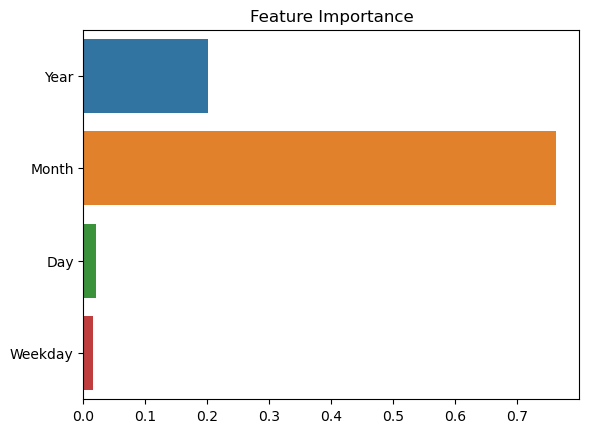

In [14]:
# Plot feature importance for Random Forest
feature_importance = rf_reg.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

Linear Regression:

Mean Absolute Error (MAE): The Linear Regression model has an MAE of 3.998, indicating the average absolute difference between predicted and actual values is approximately 4 units.
Mean Squared Error (MSE): With an MSE of 24.904, the model's predictions have a significant error variance, reflecting some inconsistency in prediction accuracy.
R² Score: The R² score of 0.385 suggests that the Linear Regression model explains about 38.5% of the variance in the target variable, indicating a moderate fit.
Random Forest Regression:

Mean Absolute Error (MAE): The Random Forest model shows a lower MAE of 3.111, meaning it predicts values more accurately on average compared to the Linear Regression model.
Mean Squared Error (MSE): The MSE of 18.122 is also lower than that of Linear Regression, indicating that the Random Forest model has a more consistent and accurate prediction performance.
R² Score: The R² score of 0.552 reveals that the Random Forest model explains 55.2% of the variance in the target variable, significantly outperforming the Linear Regression model.
Overall Conclusion
Random Forest Outperformance: The Random Forest model outperforms Linear Regression across all metrics (MAE, MSE, and R²). It provides more accurate predictions and better explains the variance in the target variable, making it the preferred model for this analysis. The feature importance plot further supports the understanding of which features are most influential in the prediction process.





